<a href="https://colab.research.google.com/github/Zullen17/cases/blob/main/ProyectoDS_ParteIII__Nu%C3%B1ez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/Entregas Colab Notebooks/BankChurners.csv')
df.shape

(10127, 23)

This dataset contains a wealth of customer information collected from within a consumer credit card portfolio, with the aim of helping analysts predict customer attrition. It includes comprehensive demographic details such as age, gender, marital status and income category, as well as insight into each customer’s relationship with the credit card provider such as the card type, number of months on book and inactive periods. Additionally it holds key data about customers’ spending behavior drawing closer to their churn decision such as total revolving balance, credit limit, average open to buy rate and analyzable metrics like total amount of change from quarter 4 to quarter 1, average utilization ratio and Naive Bayes classifier attrition flag (Card category is combined with contacts count in 12months period alongside dependent count plus education level & months inactive). Faced with this set of useful predicted data points across multiple variables capture up-to-date information that can determine long term account stability or an impending departure therefore offering us an equipped understanding when seeking to manage a portfolio or serve individual customers

In [ ]:
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


#1. GRÁFICO DE PUNTOS:
Se desea conocer si hay una representación o relación entre la edad y el límite de crédito de los clientes. Para esto se realiza un gráfico de puntos. 

Text(0, 0.5, 'Credit Limit')

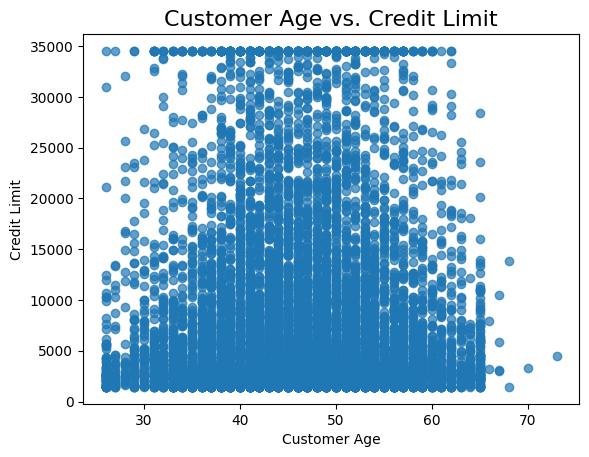

In [ ]:
fig, ax = plt.subplots()
mpl.style.use('Solarize_Light2')
ax.scatter(df['Customer_Age'],df['Credit_Limit'], alpha=0.7)
ax.set_title('Customer Age vs. Credit Limit')
ax.set_xlabel('Customer Age')
ax.set_ylabel('Credit Limit')

Se puede observar que los puntos se distribuyen al azar sin un patrón, la relación en  este caso es débil, considerando una falta de relación de dependencia. La concentración de estos puntos está en los límites de créditos bajos y entre las edades  40 y 50 con la mayor amplitud de límite. Sin poder sacar una conclusión relevante.

#2. HISTOGRAMA
Se desea estudiar los valores de los límites de créditos actuales y su frecuencia. Para esto se realizará un histograma.

Text(0.5, 1.0, 'Histograma de Credit Limit')

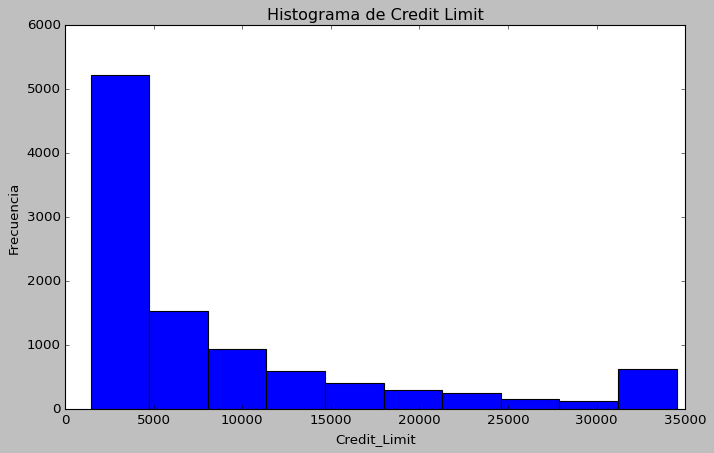

In [ ]:
mpl.style.use('classic')
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(x= df.Credit_Limit, bins=None, density=False, orientation='vertical')
ax.set_xlabel('Credit_Limit')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Credit Limit')

La frecuencia más alta se encuentra entre los límites de crédito más bajo, siendo de este modo conservador y comparando con el gráfico anterior podemos verificar que mayormente los créditos están en los rangos bajos.

#3. PIECHART:
Para saber la distribución del Marital Status, se realiza un piechart, creo un new df para contar los valores de cada categoría y luego graficar.

In [ ]:
new_df = df['Marital_Status'].value_counts().rename_axis('sub_cat_values').reset_index(name='counts')
new_df.head(4)

,sub_cat_values,counts
0,Married,4687
1,Single,3943
2,Unknown,749
3,Divorced,748


In [ ]:
# set Lables and Values
Labels = new_df.sub_cat_values
Values = new_df.counts

([<matplotlib.patches.Wedge at 0x7f304b42bdc0>,
 [Text(0.1281854519425032, 1.092505601775248, 'Married'),
  Text(-0.6039264839528234, -0.9193871882837938, 'Single'),
  Text(0.843841918694123, -0.7056421304419268, 'Unknown'),
  Text(1.0705181790981453, -0.2529640848428716, 'Divorced')])

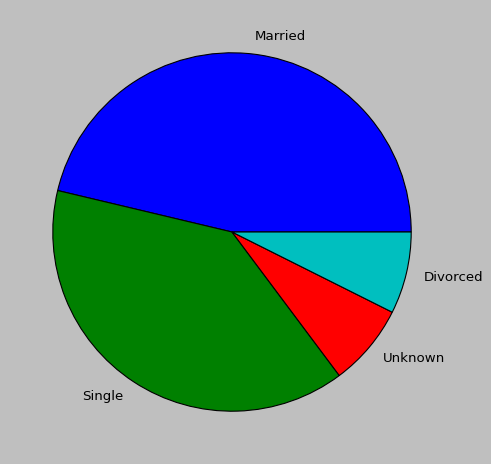

In [ ]:
fig,ax = plt.subplots(figsize =(10,7))
ax.pie( Values,labels = Labels)



Se observa en el gráfico que el mayor % lo tiene el estatus Married seguido por el Single.

#4. PIECHART: 
Para saber la distribución Card_Category, se realiza un piechart, creo un new df para contar los valores de cada categoría y luego graficar.

In [ ]:
new_df = df['Card_Category'].value_counts().rename_axis('sub_cat_values').reset_index(name='counts')
new_df.head(4)

,sub_cat_values,counts
0,Blue,9436
1,Silver,555
2,Gold,116
3,Platinum,20


In [ ]:
# set Lables and Values
Labels = new_df.sub_cat_values
Values = new_df.counts

([<matplotlib.patches.Wedge at 0x7f3049a8b1c0>,
 [Text(-1.0748236255123569, 0.23399609834455073, 'Blue'),
  Text(1.0639978565404307, -0.2791210512974062, 'Silver'),
  Text(1.0987121518876948, -0.053212848958794905, 'Gold'),
  Text(1.0999788283477512, -0.006824748105858277, 'Platinum')])

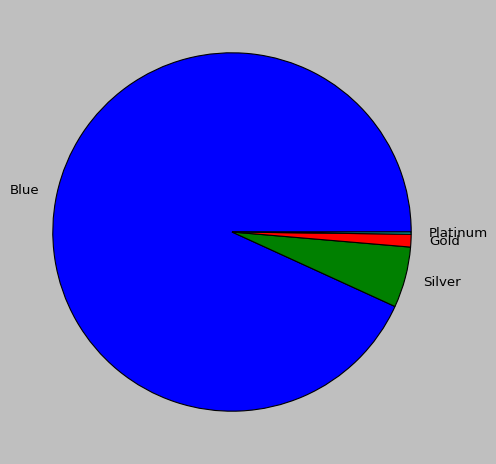

In [ ]:
fig,ax = plt.subplots(figsize =(10,7))
ax.pie( Values,labels = Labels)

La conclusión que podemos observar en los últimos gráficos es que el banco es muy conservador, manteniendo el límite de crédito bajo para la mayoría de los clientes lo cual corresponde con el alto porcentaje de la categoría "Blue" (tarjeta de menor categoría)

CON SEABORN
#5. HISTOGRAMA
Se gráfica para saber cuántos cliente son: Existing Customer y Attrited Customer, y tener conocimiento de la cantidad de clientes que se han perdido a lo largo del tiempo.

<Axes: xlabel='Attrition_Flag', ylabel='Count'>

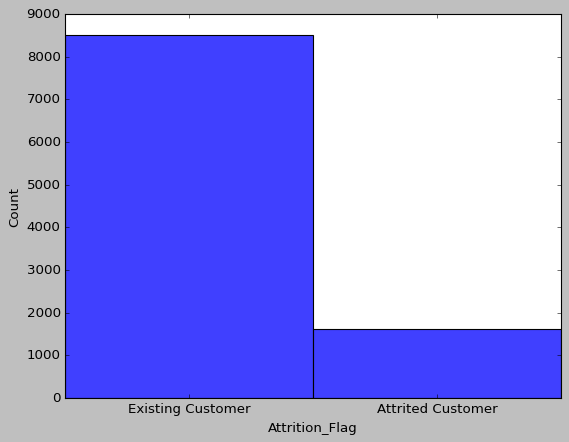

In [ ]:
# Histograma
Attrition = df['Attrition_Flag']
# Axis-Level
sns.histplot(data=Attrition,)


Se puede observar en el gráfico que supera ampliamente en cantidad el Existing Customer, queda analizar el % de Attrited Customer, estos clientes que se han perdido a lo largo del tiempo.

# 6. FIGURE-LEVEL 
Se genera un figure-level para identificar cuántos de estos clientes son Masculinos o Femeninos.

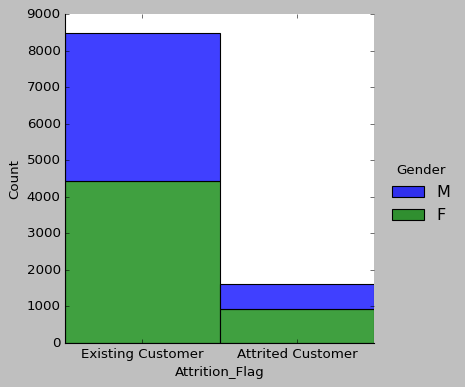

In [ ]:
# Figure-level
sns.displot(data=df, x='Attrition_Flag', hue='Gender',multiple='stack')

Se puede observar que el mayor % de ambos escenarios son F, sin embargo el valor está bastante parejo para llegar a una conclusión relevante.

# 7. BARPLOT
Se genera un BARPLOT para identificar según el Education_Level el límite de crédito asignado. Para corroborar si tiene alguna influencia en el límite.

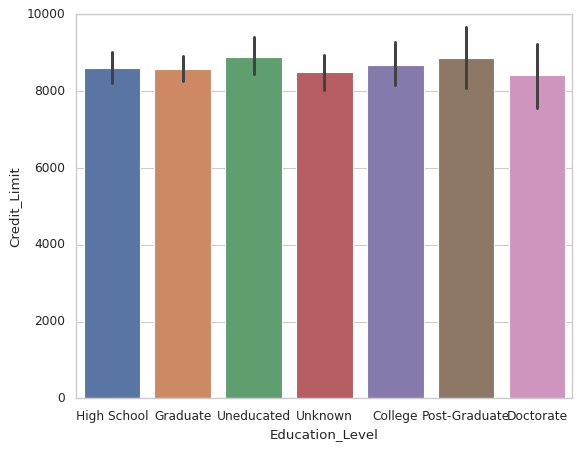

In [ ]:
# Barplot
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Education_Level", y="Credit_Limit", data=df)

El mayor límite de crédito se refleja en Post-Graduate, sin embargo es necesario realizar otro análisis con más parámetros para determinar si realmente esto influye en el límite de crédito.

# 1. PREGUNTAS DE INTERÉS O HIPÓTESIS
Objetivo General:

Opción 1
1. Cuál sería el límite de crédito para otorgar a un cliente nuevo basado en la historía que se tiene según las variables?

Opción 2
2. Cuál es la Probabilidad que un cliente se dé de baja?

Objetivos específicos:
3. Hay una relación directa con los límites de crédito y edad? o límites de crédito y nivel de educación?
4. Cuáles son los clientes que mejor pagan?
5. Cuál es la Distribución de clientes que se dan de baja?


# 2. Visualizaciones: Univariados y Bivariados

Univariabo: Bar chart

Text(0, 0.5, 'Customer')

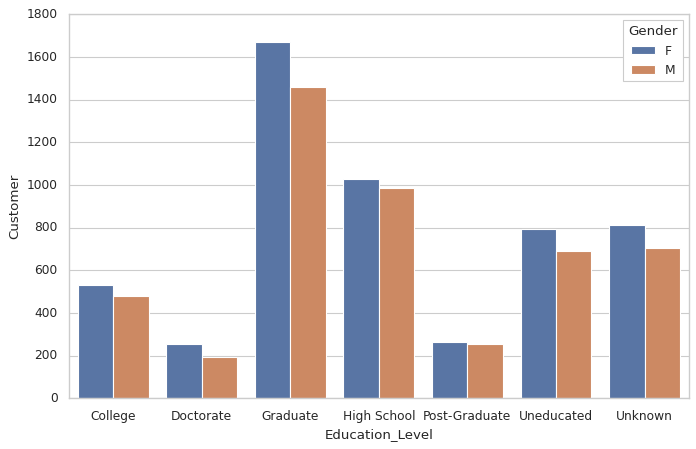

In [ ]:
df_n=df[['CLIENTNUM','Education_Level','Gender']].groupby(by=['Education_Level','Gender']).count().reset_index()
df_n.head()
plt.figure(figsize=(10,6))
p = sns.barplot(y='CLIENTNUM',x='Education_Level',hue='Gender',data=df_n);
p.set_ylabel('Customer')


Se observa en el gráfico la mayoría de los clientes presentan un nivel de educación "Graduate" y en todas las categorías la mayoría de los clientes presentan género masculino. Sin embargo con el gráfico anterior podemos visualizar que no necesariamente esta categoría de "Graduate" tiene el mayor Credit_Limit. El post-graduate es una de las categorías con mayor límite de crédito y presenta menor cantidad de clientes para esta categoría, teniendo sentido si la mayoría de los límites de créditos son bajos.

Bivariado: Boxplot

Text(0, 0.5, 'Total_Revolving_Bal')

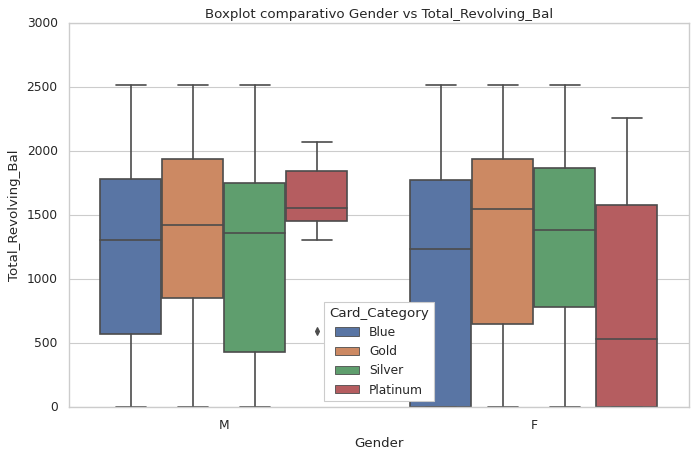

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df.Gender, y= df.Total_Revolving_Bal, hue=df.Card_Category)
plt.title('Boxplot comparativo Gender vs Total_Revolving_Bal')
plt.xlabel('Gender')
plt.ylabel('Total_Revolving_Bal')

Entendiendo el concepto de Total_Revolving_Bal:Si el cliente no paga el saldo de su cuenta de crédito en su totalidad el mes correspondiente, la parte impaga se transfiere al mes siguiente. De este dato se podría sacar conclusiones sobre si son buenos pagadores o no, separado por categoría.

# Gráfico BoxPlot para comparar los balances impagos vs. el género

Text(0, 0.5, 'Total_Revolving_Bal')

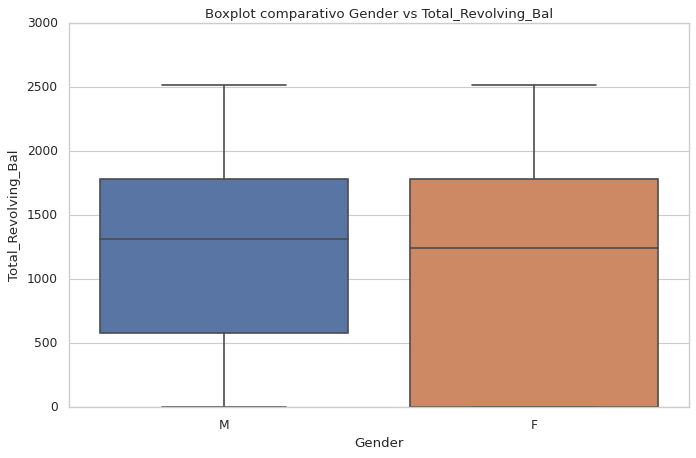

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df.Gender, y= df.Total_Revolving_Bal)
plt.title('Boxplot comparativo Gender vs Total_Revolving_Bal')
plt.xlabel('Gender')
plt.ylabel('Total_Revolving_Bal')

La mediana de hombres es ligeramente mayor que la mediana para mujeres, y la variabilidad para mujeres es mayor que la de hombres. Este datos es referente a los impagos de ambos casos.

# Resúmenes numéricos básicos acordes con los tipos de variables disponibles.

Modelo lineal simple por medio de la librería statsmodels

In [ ]:
import statsmodels.formula.api as sm

In [ ]:
model1 = 'Credit_Limit~Gender'
lm1   = sm.ols(formula = model1, data = df).fit()
print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:           Credit_Limit   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     2179.
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        12:33:38   Log-Likelihood:            -1.0569e+05
No. Observations:               10127   AIC:                         2.114e+05
Df Residuals:                   10125   BIC:                         2.114e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5023.8543    112.643     44.600      

Modelo lineal de regresión múltiple por medio de la librería statsmodels

In [ ]:
model2 = 'Credit_Limit~Gender + Customer_Age'
lm2   = sm.ols(formula = model2, data = df).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:           Credit_Limit   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     1090.
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        12:33:41   Log-Likelihood:            -1.0569e+05
No. Observations:               10127   AIC:                         2.114e+05
Df Residuals:                   10124   BIC:                         2.114e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4509.5984    488.071      9.240   

In [ ]:
df['Customer_Age'].describe().round(1)

count    10127.0
mean        46.3
std          8.0
min         26.0
25%         41.0
50%         46.0
75%         52.0
max         73.0
Name: Customer_Age, dtype: float64

In [ ]:
df['Credit_Limit'].describe().round(1)

count    10127.0
mean      8632.0
std       9088.8
min       1438.3
25%       2555.0
50%       4549.0
75%      11067.5
max      34516.0
Name: Credit_Limit, dtype: float64

#3 Interpretación del modelo:
1. Coeficiente género: muestra el masculino,el coeficiente es 7664.8983 para los empleados de la misma edad.
2. Coeficiente edad:si la edad aumenta en un año, se espera que el límite de crédito aumente 11.0695
3. Intercepto: Representa el efecto común a todos los individuos: 4509.5984
4. Coeficiente R2:0.177 es demasiado bajo, el 17.7% de la variabilidad es explicada por el modelo lineal.

# Resumen de estos primeros análisis
1. Con los datos obtenidos se obtiene con el modelo que el % de la variabilidad explicada por el modelo final es muy baja, se tomó en cuenta límite de crédito y edad. en lo gráficos también se define que falta relación de dependencia de estas variables, la edad no sería determinante para otorgar un mayor límite de crédito.
2. La mediana del saldo impago es mayor la de los hombres que la mediana de las mujeres, aunque estás tienen una mayor variabilidad.
3. Para la mayoría de los clientes la categoría de tarjeta otorgada es Blue(categoría con menor límite de crédito), como hipótesis de este caso se requiere saber si es posible saber cuánto sería el límite otorgado para un nuevo cliente con las variables estudiadas.

# Estructurando un Proyecto de DS (parte II)


CONTEXTO COMERCIAL: 
Este proyecto contiene información bancaria en donde involucra la cartera de los clientes basado en las tarjetas de crédito, incluyendo detalles demográficos como la edad, género,estado civil,categoría de ingresos entre otros. El objetivo es ayudar con esta información a los analistas para predecir el comportamiento de los futuros clientes. Además, contiene datos clave sobre el comportamiento de gasto de los clientes acercándose a su decisión de abandono. Con esta información actualizada también se puede determinar la estabilidad de la cuenta a largo plazo, por lo tanto, nos ofrece una comprensión del comportamiento de cada caso cuando buscamos administrar una cartera o atender a clientes individuales.


PROBLEMA COMERCIAL:
La actividad principal es mostrar visualizaciones que permitan determinar patrones de los clientes y empezar a responder las preguntas que se plantean a continuación.

CONTEXTO ANÁLITICO:
Se trabajará sobre el dataset, en donde se incluye la principal información:

CLIENTNUM', ID CLIENTE

'Attrition_Flag':CLIENTES QUE SE HAN PERDIDO

'Customer_Age': EDAD

'Gender': GÉNERO

'Education_Level':NIVEL DE EDUCACIÓN

'Marital_Status': ESTADO CIVIL

'Income_Category': INGRESOS

'Card_Category': CATEGORÍA DE LA TARJETA

'Months_on_book': MESES TRANSCURRIDOS DESDE LA FECHA DE INICIO DEL PRÉSTAMO

'Credit_Limit', LÍMITE DE CRÉDITO

'Total_Revolving_Bal': CRÉDITO RENOVABLE



   

 Para la primera etapa de visualización Se realizaron las siguientes preguntas:

  1. ¿Hay relación entre edad y límite de crédito de los clientes?
       (Gráfico de puntos)
  2. Determinar la frecuencia de los límites de crédito
       (Histograma)
  3. Identificar la distribución del estado civil de los clientes.
       (Piechart)
  4. Identificar la distribución de las categorías de las tarjetas.
       (Piechart)
  5. ¿Cuántos clientes son los existentes y cuántos son los que abandonaron?
       (Histograma)
  6. En base a la visualización anterior identificar por género.
       (Figure-Level)
  7. Identificar según el nivel de educación el límite de crédito otorgado.
       (Barplot)

# Estructurando un proyecto de DS-parte III

Variable objetivo: elección de la variable objetivo

In [ ]:
df = pd.get_dummies(df,columns=['Income_Category'])

In [ ]:
df = pd.get_dummies(df,columns=['Card_Category'])

In [ ]:
df = pd.get_dummies(df,columns=['Gender'])

In [ ]:
df = pd.get_dummies(df,columns=['Education_Level'])

In [ ]:
df = pd.get_dummies(df,columns=['Attrition_Flag'])

In [ ]:
df = pd.get_dummies(df,columns=['Marital_Status'])

In [ ]:
import pandas as pd
X = df.drop("Credit_Limit", 1) # feature matrix
y = df['Credit_Limit']  # target feature
df.head()

<ipython-input-72-2a4b3b15ce81>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop("Credit_Limit", 1) # feature matrix


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Attrition_Flag_Attrited Customer,Attrition_Flag_Existing Customer,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,...,1,0,0,0,0,1,0,1,0,0
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,...,0,0,0,0,0,1,0,0,1,0
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,...,0,0,0,0,0,1,0,1,0,0
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,...,1,0,0,0,0,1,0,0,0,1
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,...,0,0,1,0,0,1,0,1,0,0


In [ ]:
y

0        12691.0
1         8256.0
2         3418.0
3         3313.0
4         4716.0
          ...   
10122     4003.0
10123     4277.0
10124     5409.0
10125     5281.0
10126    10388.0
Name: Credit_Limit, Length: 10127, dtype: float64

Método de feature selection para reducir la dimensionalidad del dataset

Se utilizarán para comparar su rendimiento el Forward selection 

In [ ]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
df.isnull().sum()
df = df.dropna() 

In [ ]:
forward_selection(X,y)

<ipython-input-74-a6ce63c591b0>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-74-a6ce63c591b0>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-74-a6ce63c591b0>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-74-a6ce63c591b0>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-74-a6

['Gender_M',
 'Card_Category_Blue',
 'Avg_Utilization_Ratio',
 'Gender_F',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Card_Category_Platinum',
 'Total_Relationship_Count',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
 'Card_Category_Gold',
 'Income_Category_$80K - $120K',
 'Contacts_Count_12_mon',
 'Income_Category_$40K - $60K',
 'Months_Inactive_12_mon',
 'Total_Amt_Chng_Q4_Q1',
 'Income_Category_$120K +',
 'Card_Category_Silver',
 'Total_Ct_Chng_Q4_Q1',
 'Education_Level_Graduate',
 'Education_Level_Unknown',
 'Months_on_book',
 'Marital_Status_Unknown',
 'Marital_Status_Married',
 'Dependent_count',
 'CLIENTNUM']

Una vez obtenidas las variables serleccionadas se utilizará un algoritmo de regresión para entrenar con los datos obtenidos.

Métrica algoritmo de regresión

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
df

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Attrition_Flag_Attrited Customer,Attrition_Flag_Existing Customer,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,...,1,0,0,0,0,1,0,1,0,0
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,...,0,0,0,0,0,1,0,0,1,0
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,...,0,0,0,0,0,1,0,1,0,0
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,...,1,0,0,0,0,1,0,0,0,1
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,2,40,3,2,3,4003.0,1851,2152.0,...,0,0,0,0,0,1,0,0,1,0
10123,710638233,41,2,25,4,2,3,4277.0,2186,2091.0,...,0,0,0,1,1,0,1,0,0,0
10124,716506083,44,1,36,5,3,4,5409.0,0,5409.0,...,1,0,0,0,1,0,0,1,0,0
10125,717406983,30,2,36,4,3,3,5281.0,0,5281.0,...,0,0,0,0,1,0,0,0,0,1


Se selecciona como métrica: Error absoluto Medio (MAE).

Ventajas: 



1.   El MAE que obtiene está en la misma unidad que la variable de salida.
2.   Es más robusto a los valores atípicos.





In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression
# crear el modelo
lr = LinearRegression()
# Ajustar el modelo con X_train y y_train
lr.fit(X_train,y_train)
# PRedecir con X_test
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 5.550229575046911e-12


En resumen, el MAE es una medida de la precisión promedio de un modelo de regresión. Cuanto menor sea el MAE, mejor será la precisión del modelo en la predicción de los valores reales.